In [4]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk import FreqDist

df=pd.read_csv("C:\\Users\\Yogavarshni\\OneDrive\\Attachments\\Documents\\2nd_sem\\ML\\AITA_combinedcsv\\AITA_combined_comments.csv",nrows=20)
df.head(5)    

,permalink,associated_award,created,subreddit_name_prefixed,downs,num_reports,author_flair_type,comment_type,treatment_tags,score_hidden,...,unrepliable_reason,score,collapsed_because_crowd_control,approved_by,author_flair_css_class,collapsed_reason_code,mod_reports,send_replies,report_reasons,author_patreon_flair
0,/r/AmItheAsshole/comments/187qp3s/aitah_for_po...,NaN,1701388803,r/AmItheAsshole,0,NaN,text,NaN,[],False,...,NaN,10,NaN,NaN,NaN,NaN,[],True,NaN,False
1,/r/AmItheAsshole/comments/187pj8a/aita_for_tel...,NaN,1701388805,r/AmItheAsshole,0,NaN,text,NaN,[],False,...,NaN,1,NaN,NaN,NaN,NaN,[],True,NaN,False
2,/r/AmItheAsshole/comments/187n1wl/aita_for_wan...,NaN,1701388807,r/AmItheAsshole,0,NaN,text,NaN,[],False,...,NaN,1,NaN,NaN,NaN,NaN,[],True,NaN,False
3,/r/AmItheAsshole/comments/187n1wl/aita_for_wan...,NaN,1701388808,r/AmItheAsshole,0,NaN,text,NaN,[],False,...,NaN,4,NaN,NaN,NaN,NaN,[],True,NaN,False
4,/r/AmItheAsshole/comments/187qgh4/aita_for_tel...,NaN,1701388810,r/AmItheAsshole,0,NaN,text,NaN,[],False,...,NaN,6,NaN,NaN,NaN,NaN,[],True,NaN,False


In [5]:
import pandas as pd

# Read the CSV file with only the specified columns
df = pd.read_csv("C:\\Users\\Yogavarshni\\OneDrive\\Attachments\\Documents\\2nd_sem\\ML\\AITA_combinedcsv\\AITA_combined_comments_original.csv", header=0)
df.head(5)

,parent_id,body,ups,link_id,score
0,t3_187qp3s,I think many people make the mistake of thinki...,10,t3_187qp3s,10
1,t3_187pj8a,"NTA, HOWEVER, windfalls like that could easily...",1,t3_187pj8a,1
2,t3_187n1wl,Nta. Sue him. I once heard a guy sued a family...,1,t3_187n1wl,1
3,t1_kbfg5rz,How is it not his fault for hitting something ...,4,t3_187n1wl,4
4,t1_kbgijgp,It’s far more likely they’re in their 50s-60s,6,t3_187qgh4,6


In [6]:
# Filter the DataFrame to keep only rows where 'parent_id' equals 'link_id'
filtered_df = df[df['parent_id'] == df['link_id']]
filtered_df.head(5)

,parent_id,body,ups,link_id,score
0,t3_187qp3s,I think many people make the mistake of thinki...,10,t3_187qp3s,10
1,t3_187pj8a,"NTA, HOWEVER, windfalls like that could easily...",1,t3_187pj8a,1
2,t3_187n1wl,Nta. Sue him. I once heard a guy sued a family...,1,t3_187n1wl,1
5,t3_187qgh4,Pretty sure I read this story a month or so ago.,1,t3_187qgh4,1
8,t3_187n1wl,Yta \n\nI live on a road where the limit is 35...,-2,t3_187n1wl,-2


In [7]:
df.shape

(1048573, 5)

In [8]:
filtered_df.shape

(575247, 5)

In [9]:
# Check for null values
null_values = filtered_df.isnull().sum()
null_values

parent_id    0
body         0
ups          0
link_id      0
score        0
dtype: int64

In [10]:
filtered_df.describe()

,ups,score
count,575247.000000,575247.000000
mean,17.360369,17.360369
std,260.932688,260.932688
min,-1118.000000,-1118.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,33133.000000,33133.000000


In [11]:
# Adding new columns for text length
df['char_count'] = df['body'].apply(len)
df['word_count'] = df['body'].apply(lambda x: len(x.split()))

# Display basic statistics
print(df[['char_count', 'word_count']].describe())

         char_count    word_count
count  1.048573e+06  1.048573e+06
mean   3.107005e+02  5.548874e+01
std    4.237533e+02  7.403558e+01
min    1.000000e+00  1.000000e+00
25%    7.800000e+01  1.500000e+01
50%    1.780000e+02  3.300000e+01
75%    3.690000e+02  6.800000e+01
max    8.599000e+03  1.847000e+03


In [12]:
# Tokenize words and calculate frequency
all_words = ' '.join(df['body']).split()
freq_dist = FreqDist(all_words)

# Display the most common words
print(freq_dist.most_common(10))

[('to', 1853581), ('the', 1617484), ('and', 1422909), ('a', 1293135), ('you', 1070167), ('I', 980808), ('is', 783087), ('of', 774773), ('your', 698239), ('that', 662600)]


In [13]:
# Set of unique words
unique_words = set(all_words)
print(f"Number of unique words: {len(unique_words)}")

Number of unique words: 597899


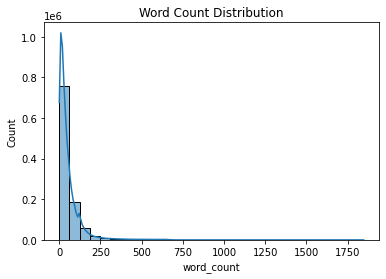

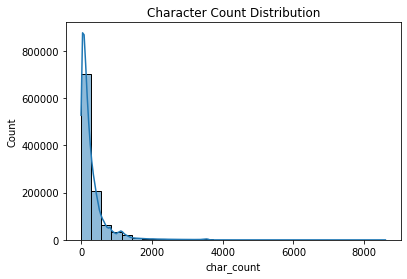

In [14]:
# Histogram of word counts
sns.histplot(df['word_count'], bins=30, kde=True)
plt.title('Word Count Distribution')
plt.show()

# Histogram of character counts
sns.histplot(df['char_count'], bins=30, kde=True)
plt.title('Character Count Distribution')
plt.show()

In [15]:
import nltk
from nltk.corpus import stopwords
from nltk import FreqDist
#from wordcloud import WordCloud
import matplotlib.pyplot as plt
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yogavarshni\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
# Assuming English language
stop_words = set(stopwords.words('english'))
df['stop_words_count'] = df['body'].apply(lambda x: len([word for word in x.lower().split() if word in stop_words]))

# Average number of stop words
print(f"Average number of stop words: {df['stop_words_count'].mean()}")

Average number of stop words: 27.5654389346283


In [17]:
# Set of English stop words
stop_words = set(stopwords.words('english'))

# Function to clean and remove stop words
def remove_stop_words(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)

# Apply the function to the 'body' column
df['filtered_body'] = df['body'].apply(remove_stop_words)

# Tokenize words in the filtered body
filtered_words = ' '.join(df['filtered_body']).split()


In [18]:
# Frequency distribution of filtered words
freq_dist_filtered = FreqDist(filtered_words)

# Print the 10 most common words
print(freq_dist_filtered.most_common(10))


[('like', 239190), ('would', 204981), ('get', 165458), ('think', 132849), ('one', 118137), ('want', 116647), ('people', 114502), ('NTA', 114300), ('know', 108126), ('even', 105735)]


In [19]:
import matplotlib.pyplot as plt
from nltk import FreqDist

# Get the 10 most common words and their frequencies
common_words = freq_dist_filtered.most_common(10)

# Create a DataFrame from the most common words
df_common_words = pd.DataFrame(common_words, columns=['Word', 'Frequency'])


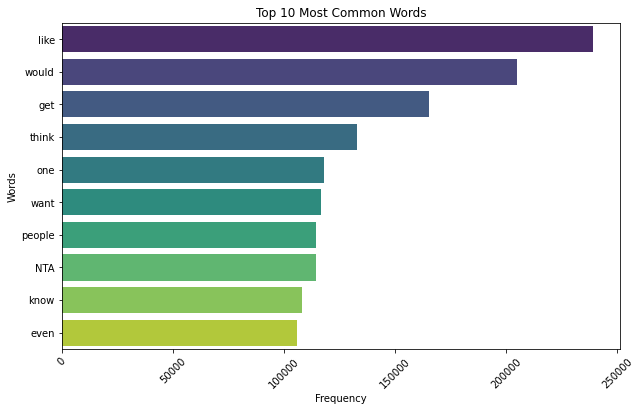

In [20]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Plot bar chart
sns.barplot(x='Frequency', y='Word', data=df_common_words, palette='viridis')

# Add chart labels and title
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 10 Most Common Words')
plt.xticks(rotation=45)
plt.show()
